# **Prepare datasets**

Pada proyek **Neural Network (NN)** kali ini kami menggunakan data sekunder dengan nama "**train_preprocess.tsv.txt**" yang terdiri dari 2 kolom (**tweet dan label**) berisi data tweet dan analisa sentimennya (positif, negatif, dan netral)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset from database
import pandas as pd

# Tentukan path file TSV
tsv_path = '/content/drive/MyDrive/Colab Notebooks/Platinum/train_preprocess.tsv.txt'

# Definisikan nama kolom
column_names = ['tweet', 'label']

# Baca data dari file TSV ke DataFrame dengan menambahkan nama kolom
df = pd.read_csv(tsv_path, sep='\t', names=column_names)

In [ ]:
df.head()

,tweet,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
df.shape

(11000, 2)

In [ ]:
df.label.value_counts()

positive    6416
negative    3436
neutral     1148
Name: label, dtype: int64

In [ ]:
# Menghapus duplikat pada kolom "tweet"
df = df.drop_duplicates(subset='tweet')

# Memeriksa data setelah menghapus duplikat
print("\nData setelah menghapus duplikat:")
print(df)


Data setelah menghapus duplikat:
                                                   tweet     label
0      warung ini dimiliki oleh pengusaha pabrik tahu...  positive
1      mohon ulama lurus dan k212 mmbri hujjah partai...   neutral
2      lokasi strategis di jalan sumatera bandung . t...  positive
3      betapa bahagia nya diri ini saat unboxing pake...  positive
4      duh . jadi mahasiswa jangan sombong dong . kas...  negative
...                                                  ...       ...
10993  f - demokrat dorong upaya kemandirian energi n...   neutral
10994                                        tidak bosan  positive
10996  enak rasa masakan nya apalagi kepiting yang me...  positive
10998  pagi pagi di tol pasteur sudah macet parah , b...  negative
10999  meskipun sering belanja ke yogya di riau junct...  positive

[10933 rows x 2 columns]


In [ ]:
df.shape

(10933, 2)

In [ ]:
df.label.value_counts()

positive    6383
negative    3412
neutral     1138
Name: label, dtype: int64

# **Text Normalization/Cleansing**

Lalu kita lakukan cleansing sebagai berikut

In [ ]:
!pip install --upgrade Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()

    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', ' ', string)
    string = re.sub(r'https://t.co/\w+', ' ', string)
    string = re.sub('\n', ' ', string)
    string = re.sub('rt', ' ', string)
    string = re.sub('  +', ' ', string)
    string = re.sub(r'pic.twitter.com.[\w]+', '', string)
    string = re.sub('user', ' ', string)
    string = re.sub(r"\bx\w{2}\b", "", string)
    string = re.sub(r'‚Ä¶', '', string)
    string = re.sub('[^0-9a-zA-Z]+', ' ', string)

    # Lematisasi menggunakan Sastrawi
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    string = stemmer.stem(string)

    # Menghapus stop words menggunakan Sastrawi
    stopword_factory = StopWordRemoverFactory()
    stopword_remover = stopword_factory.create_stop_word_remover()
    string = stopword_remover.remove(string)

    return string

In [ ]:
df['tweet_clean'] = df.tweet.apply(cleansing)

In [ ]:
df.head()

,tweet,label,tweet_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...


# **Feature Extraction: Bag of Words**

Setelah itu kita lakukan Feature Extraction menggunakan metode Bag of Words

In [ ]:
# Kita simpan teks ke dalam sebuah variabel
data_preprocessed = df.tweet_clean.tolist()

In [ ]:
# Untuk melakukan Feature Extraction, kita menggunakan library "Sklearn atau scikit-learn".
# Sklearn adalah library untuk melakukan task-task Machine Learning.
# "CountVectorizer" merupakan salah satu modul untuk melakukan "BoW"

from sklearn.feature_extraction.text import CountVectorizer

# Kita proses Feature Extraction
count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print ("Feature Extraction selesai")

Feature Extraction selesai


In [ ]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# **Prepare train & test datasets/Splitting Dataset**

Split dataset menjadi 80% untuk train dan 20% untuk test.

In [ ]:
from sklearn.model_selection import train_test_split

classes = df.label

In [ ]:
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10881     neutral
10925     neutral
10967     neutral
10969     neutral
10993     neutral
Name: label, Length: 3414, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

# Training (Neural Network)

Jalankan training dengan metode Neural Network. "MLPClassifier" merupakan salah satu modul dari "Neural Network" pada library Sklearn.

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_test, y_test)

print ("Training selesai")

Training selesai


In [ ]:
pickle.dump(model, open("model.p", "wb"))

# **Evaluation**

Langkah selanjutnya adalah "Evaluation". Module "classification_report" dari Sklearn merupakan salah satu modul untuk melakukan "Evaluation". Pada tahap evaluasi ini kita akan menerapkan metode evaluasi Accuracy, Precision, Recall dan F1-Score.

In [ ]:
from sklearn.metrics import classification_report

test = model.predict(X_test)

print ("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.76      0.80      0.78       686
     neutral       0.92      0.52      0.66       246
    positive       0.87      0.91      0.89      1268

    accuracy                           0.83      2200
   macro avg       0.85      0.75      0.78      2200
weighted avg       0.84      0.83      0.83      2200



Hasilnya nilai F1 Score ada pada angka ***0.79 untuk Negative, 0.66 untuk Neutral, dan 0.89 untuk Positive***. Hasil ini bisa dikatakan cukup bagus untuk sebuah model dengan nilai akurasi **0.83/ 83%**.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Definisikan embed_dim, units, dan max_features sesuai dengan model keras Anda
embed_dim = 100
units = 64
max_features = 100000

# Inisialisasi dan definisikan model MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(units,), max_iter=1, random_state=42, verbose=True)

# Melatih model dengan loop manual untuk mencetak informasi setiap epoch
for epoch in range(1, 11):
    print(f"Epoch {epoch}/{10}")

    # Melatih model selama satu epoch
    mlp_model.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Menghitung loss dan accuracy pada data training
    train_loss = mlp_model.loss_
    train_accuracy = mlp_model.score(X_train, y_train)

    # Menghitung loss dan accuracy pada data test
    test_loss = mlp_model.loss_
    test_accuracy = mlp_model.score(X_test, y_test)

    # Mencetak informasi
    print(f"Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Val Loss: {test_loss:.4f} - Val Accuracy: {test_accuracy:.4f}")


Epoch 1/10
Iteration 1, loss = 0.67973582
Train Loss: 0.6797 - Train Accuracy: 0.8361 - Val Loss: 0.6797 - Val Accuracy: 0.8082
Epoch 2/10
Iteration 2, loss = 0.37940372
Train Loss: 0.3794 - Train Accuracy: 0.9289 - Val Loss: 0.3794 - Val Accuracy: 0.8673
Epoch 3/10
Iteration 3, loss = 0.24326223
Train Loss: 0.2433 - Train Accuracy: 0.9568 - Val Loss: 0.2433 - Val Accuracy: 0.8755
Epoch 4/10
Iteration 4, loss = 0.16726419
Train Loss: 0.1673 - Train Accuracy: 0.9712 - Val Loss: 0.1673 - Val Accuracy: 0.8745
Epoch 5/10
Iteration 5, loss = 0.12258978
Train Loss: 0.1226 - Train Accuracy: 0.9785 - Val Loss: 0.1226 - Val Accuracy: 0.8723
Epoch 6/10
Iteration 6, loss = 0.09435913
Train Loss: 0.0944 - Train Accuracy: 0.9826 - Val Loss: 0.0944 - Val Accuracy: 0.8718
Epoch 7/10
Iteration 7, loss = 0.07565503
Train Loss: 0.0757 - Train Accuracy: 0.9856 - Val Loss: 0.0757 - Val Accuracy: 0.8673
Epoch 8/10
Iteration 8, loss = 0.06250517
Train Loss: 0.0625 - Train Accuracy: 0.9873 - Val Loss: 0.0625

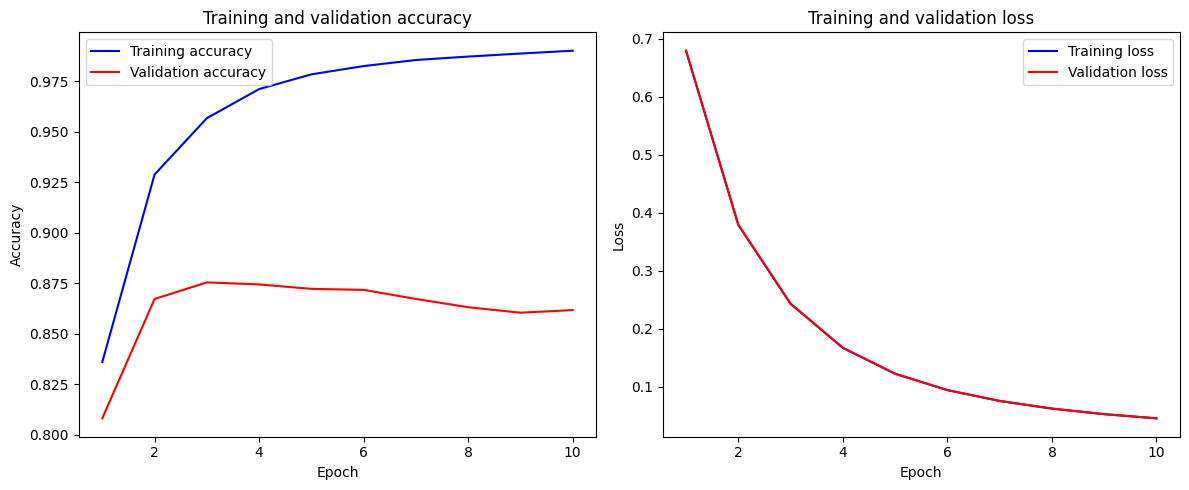

In [ ]:
import matplotlib.pyplot as plt

# Definisikan data yang diberikan pada setiap epoch
epochs = list(range(1, 11))
train_loss = [0.6797, 0.3794, 0.2433, 0.1673, 0.1226, 0.0944, 0.0757, 0.0625, 0.0529, 0.0457]
train_accuracy = [0.8361, 0.9289, 0.9568, 0.9712, 0.9785, 0.9826, 0.9856, 0.9873, 0.9888, 0.9902]
val_loss = [0.6797, 0.3794, 0.2433, 0.1673, 0.1226, 0.0944, 0.0757, 0.0625, 0.0529, 0.0457]
val_accuracy = [0.8082, 0.8673, 0.8755, 0.8745, 0.8723, 0.8718, 0.8673, 0.8632, 0.8605, 0.8618]


# Plot grafik
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Predict

Asumsi kita sudah oke dengan model yang dibikin, selanjutnya melakukan predict pada model untuk mengetes jika model sudah jalan.

In [ ]:
original_text =  '''
Rasa syukur, cukup.
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

negative


In [ ]:
original_text =  '''
Aku benci kamu.
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

negative


In [ ]:
original_text =  '''
Udara hari ini sangat sejuk
'''

# Feature Extraction
text = count_vect.transform([cleansing(original_text)])

# Kita prediksi sentimennya
result = model.predict(text)[0]
print("Sentiment:")
print()
print(result)

Sentiment:

positive
